## Merging two datasets

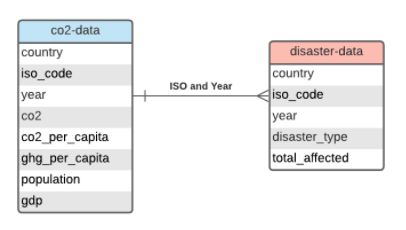

In [36]:
from IPython import display
display.Image("./merge-illustration.png")

In [37]:
import pandas as pd

disaster_df = pd.read_pickle("../data/disaster-data.pkl")
print(disaster_df.shape)

## read co2 data
co2_df = pd.read_pickle("../data/co2-data.pkl")
print(co2_df.shape)

(15369, 16)
(13325, 19)


In [38]:
disaster_df['disaster_count'] = 1
disaster_count_df = disaster_df[['year', 'iso_code','disaster_count']].groupby(['year','iso_code']).sum()
co2_disaster_df = pd.merge(co2_df, disaster_count_df, on=['iso_code','year'], how='left')
co2_disaster_df['disaster_count'] = co2_disaster_df['disaster_count'].fillna(0).astype(int)
co2_disaster_df.to_pickle('../data/co2-disaster-data.pkl')
co2_disaster_df

,iso_code,country,year,co2,consumption_co2,co2_growth_prct,co2_growth_abs,trade_co2,co2_per_capita,consumption_co2_per_capita,share_global_co2,cumulative_co2,share_global_cumulative_co2,co2_per_gdp,consumption_co2_per_gdp,population,gdp,total_ghg,ghg_per_capita,disaster_count
0,AFG,Afghanistan,1956,0.183,NaN,19.05,0.029,NaN,0.022,NaN,0.00,0.832,0.00,0.016,NaN,8398873.0,1.158124e+10,NaN,NaN,0
1,AFG,Afghanistan,1957,0.293,NaN,60.00,0.110,NaN,0.034,NaN,0.00,1.125,0.00,0.025,NaN,8535157.0,1.157897e+10,NaN,NaN,0
2,AFG,Afghanistan,1958,0.330,NaN,12.50,0.037,NaN,0.038,NaN,0.00,1.455,0.00,0.027,NaN,8680097.0,1.223884e+10,NaN,NaN,0
3,AFG,Afghanistan,1959,0.385,NaN,16.62,0.055,NaN,0.044,NaN,0.00,1.839,0.00,0.031,NaN,8833947.0,1.257988e+10,NaN,NaN,0
4,AFG,Afghanistan,1960,0.414,NaN,7.62,0.029,NaN,0.046,NaN,0.00,2.253,0.00,0.032,NaN,8996967.0,1.303325e+10,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13320,ZWE,Zimbabwe,2016,10.738,12.153,-12.17,-1.488,1.415,0.765,0.866,0.03,736.467,0.05,0.512,0.580,14030338.0,2.096179e+10,65.98,4.703,1
13321,ZWE,Zimbabwe,2017,9.582,11.248,-10.77,-1.156,1.666,0.673,0.790,0.03,746.049,0.05,0.437,0.512,14236599.0,2.194784e+10,NaN,NaN,2
13322,ZWE,Zimbabwe,2018,11.854,13.163,23.72,2.273,1.308,0.821,0.912,0.03,757.903,0.05,0.522,0.580,14438812.0,2.271535e+10,NaN,NaN,1
13323,ZWE,Zimbabwe,2019,10.949,12.422,-7.64,-0.905,1.473,0.748,0.848,0.03,768.852,0.05,NaN,NaN,14645473.0,NaN,NaN,NaN,2


## Check which rows would drop out due to not being countries

In [39]:
print(disaster_df.country.count())
print(co2_df.country.count())
co2_df[co2_df.iso_code.isin(disaster_df.iso_code) == False].country.value_counts()

15369
13325


Aruba                              65
Bonaire Sint Eustatius and Saba    65
Curacao                            65
Faeroe Islands                     65
Greenland                          65
Malta                              65
Saint Pierre and Miquelon          65
Nauru                              57
Andorra                            31
Liechtenstein                      31
Mayotte                            31
Antarctica                         21
Christmas Island                   14
Kosovo                             13
Name: country, dtype: int64

**Observations** Nothing alarming here as they aren't actually countries or don't have disasters.  Was actually surprised that Greenland doesn't have any disasters.  

In [40]:
co2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13325 entries, 7 to 25203
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   iso_code                     13325 non-null  object 
 1   country                      13325 non-null  object 
 2   year                         13325 non-null  int64  
 3   co2                          13325 non-null  float64
 4   consumption_co2              3554 non-null   float64
 5   co2_growth_prct              13282 non-null  float64
 6   co2_growth_abs               13279 non-null  float64
 7   trade_co2                    3554 non-null   float64
 8   co2_per_capita               13277 non-null  float64
 9   consumption_co2_per_capita   3554 non-null   float64
 10  share_global_co2             13325 non-null  float64
 11  cumulative_co2               13325 non-null  float64
 12  share_global_cumulative_co2  13325 non-null  float64
 13  co2_per_gdp     